In [1]:
import torch

In [4]:
embeddings = torch.load('input/atac_dna_embeddings.torch').detach().cpu().numpy()

In [5]:
embeddings.shape

(116468, 768)

In [7]:
from umap import UMAP

In [17]:
import random

In [21]:
import numpy as np

In [11]:
from matplotlib import pyplot as plt

In [33]:
random_idxs = np.random.choice(np.arange(len(embeddings)), replace=False, size=10000)
random_sample = embeddings[random_idxs,:]

In [44]:
twod = UMAP(n_components=2).fit_transform(random_sample)

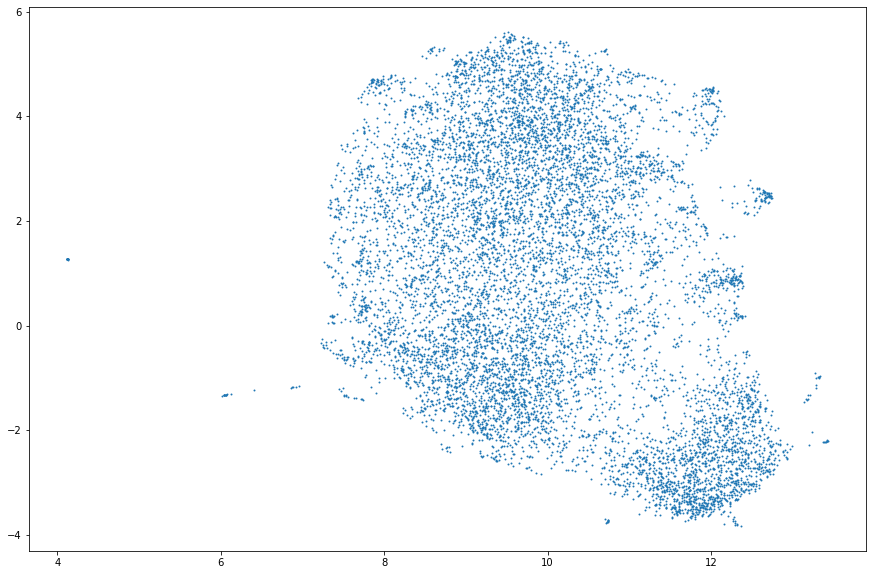

In [45]:
plt.figure(figsize=(15,10))
plt.scatter(twod[:,0], twod[:,1], s=.9)

In [37]:
umap = UMAP(n_components=32).fit(random_sample)

In [39]:
proj = umap.transform(embeddings)

In [42]:
proj = torch.tensor(proj)
print(proj.shape)

torch.Size([116468, 32])


In [43]:
torch.save(proj, 'input/projected_atac_sequences.torch')